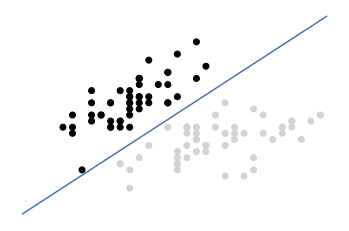

((-2.75, 2.75, -3.535335695977626, 3.954079895904671), None)

In [61]:

# In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis.  The Support Vector Machine (SVM) algorithm is a popular machine learning tool that offers solutions for both classification and regression problems.

# Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting).  An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible.  New examples are then mapped into that same space and predicted to belong to a category based on the side of the gap on which they fall.

# Load libraries
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib import pyplot as plt

# Load Iris Flower Data
# Load data with only two classes and two features
iris = datasets.load_iris()
X = iris.data[:100,:2]
y = iris.target[:100]

# Standardize Features
# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Train Support Vector Classifier
# Create support vector classifier
svc = LinearSVC(C=1.0)

# Train model
model = svc.fit(X_std, y)

# Plot Decision Boundary Hyperplane
# In this visualization, all observations of class 0 are black and observations of class 1 are light gray. The hyperplane is the decision-boundary deciding how new observations are classified. Specifically, any observation above the line will by classified as class 0 while any observation below the line will be classified as class 1.

# Plot data points and color using their class
color = ['black' if c == 0 else 'lightgrey' for c in y]
plt.scatter(X_std[:,0], X_std[:,1], c=color)

# Create the hyperplane
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off"), plt.show()

 

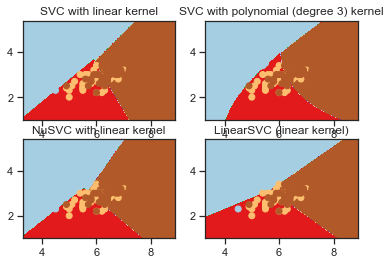

In [62]:

import numpy as np
import pylab as pl
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
                     # avoid this ugly slicing by using a two-dim dataset
Y = iris.target

h=.02 # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
svc     = svm.SVC(kernel='linear').fit(X, Y)
rbf_svc = svm.SVC(kernel='poly').fit(X, Y)
nu_svc  = svm.NuSVC(kernel='linear').fit(X,Y)
lin_svc = svm.LinearSVC().fit(X, Y)

# create a mesh to plot in
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with polynomial (degree 3) kernel',
          'NuSVC with linear kernel',
          'LinearSVC (linear kernel)']


pl.set_cmap(pl.cm.Paired)

for i, clf in enumerate((svc, rbf_svc, nu_svc, lin_svc)):
    # Plot the decision boundary. For that, we will asign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    pl.subplot(2, 2, i+1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    pl.set_cmap(pl.cm.Paired)
    pl.contourf(xx, yy, Z)
    pl.axis('tight')

    # Plot also the training points
    pl.scatter(X[:,0], X[:,1], c=Y)

    pl.title(titles[i])

pl.axis('tight')
pl.show()


In [ ]:

# data:
# The data was imported to the model directly from the web.
